In [1]:
# import the required packages

# tabular data
import pandas as pd
import numpy as np 
from tabulate import tabulate

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# train test split
from sklearn.model_selection import train_test_split

# metrics 
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score

# classification models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

# model opitmization
from sklearn.model_selection import GridSearchCV

# model evaluation
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

# time - test
import time

# math 
from math import sqrt

# statistical models 
import statsmodels.api as sm

In [2]:
notebook_start_time = time.time()

## 1. HR Analytics

### 1.1 Load and Sample the data

In [3]:
df_hr = pd.read_csv('./hr_csv_transformed.csv')

In [4]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9092 entries, 0 to 9091
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   region                        9092 non-null   int64  
 1   education                     9092 non-null   int64  
 2   no_of_trainings               9092 non-null   float64
 3   age                           9092 non-null   float64
 4   previous_year_rating          9092 non-null   float64
 5   length_of_service             9092 non-null   float64
 6   KPIs_met >80%                 9092 non-null   int64  
 7   awards_won?                   9092 non-null   int64  
 8   avg_training_score            9092 non-null   float64
 9   is_promoted                   9092 non-null   int64  
 10  department_Sales & Marketing  9092 non-null   int64  
 11  department_Operations         9092 non-null   int64  
 12  department_Technology         9092 non-null   int64  
 13  dep

In [5]:
df_hr.head()

,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,department_R&D,department_Procurement,department_Finance,department_HR,department_Legal,gender_f,gender_m,recruitment_channel_sourcing,recruitment_channel_other,recruitment_channel_referred
0,6108,1,2.0,-0.103865,0.0,-0.503161,0,0,-0.12,0,...,0,0,0,0,0,0,1,0,1,0
1,785,1,1.0,-0.677333,-2.0,-0.225465,0,0,1.04,0,...,0,0,0,0,0,0,1,0,1,0
2,1234,2,0.0,-0.321705,1.0,-0.864038,1,0,-0.44,0,...,0,0,0,0,0,0,1,0,1,0
3,6108,1,0.0,-0.436134,1.0,-0.864038,0,0,-0.08,0,...,0,0,1,0,0,0,1,1,0,0
4,1701,2,0.0,0.732668,-2.0,0.740418,0,0,-0.20,0,...,0,0,0,0,0,1,0,1,0,0


In [6]:
df_hr.describe()

,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,department_R&D,department_Procurement,department_Finance,department_HR,department_Legal,gender_f,gender_m,recruitment_channel_sourcing,recruitment_channel_other,recruitment_channel_referred
count,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,...,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000
mean,4584.995381,1.290805,0.231522,0.107887,0.583150,-0.043580,0.512868,0.064452,0.283836,0.500000,...,0.015178,0.140013,0.044435,0.036846,0.017268,0.315662,0.684338,0.429059,0.545535,0.025407
std,4079.802512,0.483942,0.559087,0.671022,1.182599,0.699312,0.499862,0.245570,0.579979,0.500027,...,0.122268,0.347020,0.206070,0.188393,0.130275,0.464805,0.464805,0.494969,0.497950,0.157366
min,31.000000,0.000000,0.000000,-1.690290,-2.000000,-1.378193,0.000000,0.000000,-0.760000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1234.000000,1.000000,0.000000,-0.436134,0.000000,-0.503161,0.000000,0.000000,-0.240000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2617.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.160000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,6108.000000,2.000000,0.000000,0.476189,2.000000,0.496839,1.000000,0.000000,0.810000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,11497.000000,2.000000,7.000000,2.017907,2.000000,2.115994,1.000000,1.000000,1.560000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df_hr.isnull().sum()

region                          0
education                       0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
is_promoted                     0
department_Sales & Marketing    0
department_Operations           0
department_Technology           0
department_Analytics            0
department_R&D                  0
department_Procurement          0
department_Finance              0
department_HR                   0
department_Legal                0
gender_f                        0
gender_m                        0
recruitment_channel_sourcing    0
recruitment_channel_other       0
recruitment_channel_referred    0
dtype: int64

In [8]:
# inspect the target class distribution 
df_hr['is_promoted'].value_counts()

0    4546
1    4546
Name: is_promoted, dtype: int64

### 1.1.1 Train and Test splits 

In [9]:
X = df_hr.drop(['is_promoted'], axis =1)
y = df_hr['is_promoted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1.1.2 Feature Importances 

In [10]:
# using logit - for classification 
lgsm = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.429350
         Iterations 7


In [11]:
lgsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                 6364
Model:                          Logit   Df Residuals:                     6343
Method:                           MLE   Df Model:                           20
Date:                Tue, 30 Jan 2024   Pseudo R-squ.:                  0.3806
Time:                        23:26:36   Log-Likelihood:                -2732.4
converged:                       True   LL-Null:                       -4411.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
region                        6.851e-06   8.88e-06      0.772      0.440   -1.06e-05    2.43e-05
education                        0.1445      0.079      1.818      0.069      -0.011       0.300
no_of_trainings                 -0.0403      0.062     -0.655      0.513      -0.161       0.080
age                             -0.3805      0.073     -5.199      0.000      -0.524      -0.237
previous_year_rating             0.2490      0.031      8.137      0.000       0.189       0.309
length_of_service                0.1946      0.063      3.086      0.002       0.071       0.318
KPIs_met >80%                    2.6255      0.084     31.276      0.000       2.461       2.790
awards_won?                      1.9333      0.210      9.198      0.000       1.521       2.345
avg_training_score               7.2899      0.233     31.287      0.000       6.833       7.747
department_Sales & Marketing     4.2095        nan        nan        nan         nan         nan
department_Operations            1.3355        nan        nan        nan         nan         nan
department_Technology           -3.8352        nan        nan        nan         nan         nan
department_Analytics            -5.3134        nan        nan        nan         nan         nan
department_R&D                  -5.6380        nan        nan        nan         nan         nan
department_Procurement          -1.3390        nan        nan        nan         nan         nan
department_Finance               1.3003        nan        nan        nan         nan         nan
department_HR                    3.7919        nan        nan        nan         nan         nan
department_Legal                 1.0080        nan        nan        nan         nan         nan
gender_f                        -2.2522    1.2e+06  -1.87e-06      1.000   -2.36e+06    2.36e+06
gender_m                        -2.2282    1.2e+06  -1.85e-06      1.000   -2.36e+06    2.36e+06
recruitment_channel_sourcing    -1.5920        nan        nan        nan         nan         nan
recruitment_channel_other       -1.4742        nan        nan        nan         nan         nan
recruitment_channel_referred    -1.4141        nan        nan        nan         nan         nan
================================================================================================
"""

### 1.2 Build the Model(s)

In [12]:
models = []

model_names = []

In [13]:
# no hyperparams except random state for consistency in results 
lg = LogisticRegression(random_state=42).fit(X_train, y_train)

models.append(lg)
model_names.append("Logistic Regression")

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# decision tree classifier 
dtree = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)

models.append(dtree)
model_names.append("Decision Tree")

In [15]:
# random forest classifier 
rf = RandomForestClassifier(random_state=42).fit(X_train,y_train)

models.append(rf)
model_names.append("Random Forest")

In [16]:
# support vector machine 
svc = SVC(random_state = 42).fit(X_train,y_train)

models.append(svc)
model_names.append("SVC")

In [17]:
# multi layer perceptron
mlp = MLPClassifier(random_state = 42).fit(X_train, y_train)

models.append(mlp)
model_names.append("Multi Layer Perceptron")

In [18]:
# adaptive boosting
ada = AdaBoostClassifier(random_state = 42).fit(X_train,y_train)

models.append(ada)
model_names.append("ADA")

In [19]:
# extreme gradient boosting 
xgb = XGBClassifier(random_state = 42).fit(X_train, y_train)

models.append(xgb)
model_names.append("XGB")

### 1.2.1 Consolidated View of Model Scores

In [20]:
scores_table = []
for model, name in zip(models, model_names):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    scores_table.append([name, train_score, test_score])

df_scores = pd.DataFrame(scores_table, columns=["Model", "Train Score", "Test Score"])

df_scores

,Model,Train Score,Test Score
0,Logistic Regression,0.728787,0.720674
1,Decision Tree,1.000000,0.749267
2,Random Forest,1.000000,0.793622
3,SVC,0.533941,0.537023
4,Multi Layer Perceptron,0.663891,0.668622
5,ADA,0.782055,0.769428
6,XGB,0.933532,0.799487


### 1.3 Evaluate and Improve the Model(s)
These models will be chosen for further evaluation and tuning  : <mark>Random Forest Classifier</mark>, <mark>Multi Layer Perceptron (Artificial Neural Network)</mark>,<mark>ADA Boost (Ensemble Model)</mark>.

In [21]:
def model_scores_classification(model):
    print(f"Model: {model}")
    
    train_pred = model.predict(X_train)
    print(f'\nTraining score: {model.score(X_train, y_train)}')

    test_pred = model.predict(X_test)
    print(f'Testing score: {model.score(X_test, y_test)}')
    
    # Training scores and report
    train_pred = model.predict(X_train)
    print('\nTraining report:')
    print(classification_report(y_train, train_pred))

    # Testing scores and report
    test_pred = model.predict(X_test)
    print('\nTesting report:')
    print(classification_report(y_test, test_pred))

    # Confusion matrix for training
    print('\nConfusion Matrix:')
    train_cm = confusion_matrix(y_train, train_pred)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Training')

    # Confusion matrix for testing
    plt.subplot(1, 2, 2)
    test_cm = confusion_matrix(y_test, test_pred)
    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Testing')

    plt.tight_layout()
    plt.show()

### 1.3.1 Model 1 (random forest classifier) 

In [ ]:
model_scores_classification(rf)

##### comments 
- the model scores are very overfitted which need to be tuned
- high variance and low bias, the model is performing well on training set but not as good on training set, meaning it is putting in close attention to the train set
- it is this way due to the 'nature' of random forest

### 1.3.1.1 Hyperparameter Inspection
##### hyperparams to be tweaked or that can be tweaked 
- <mark>n_estimators</mark> : number of trees
- <mark>criterion</mark> : quality of split
- <mark>max_depth</mark> : depth of tree, if there are too many details it might lead to overfitting? affected by:min_samples_split samples
- <mark>min_samples_split</mark> : number of samples required to split an internal node 
- <mark>min_samples_leaf</mark> : number of samples required to become a leaf? makes model more generalised (add later on?) 
- <mark>max_features</mark> : number of features to consider for a best split 

### 1.3.1.1 (a)  n_estimators

##### n_estimators vs. train and test scores  (range : 100-1000)

In [ ]:
n_estimators_values = np.arange(100,1100,100)

# Initialize lists to store training and test scores
train_scores = []
test_scores = []

# Iterate over different n_estimators values
for n_estimators in n_estimators_values:
    # Create and fit the Random Forest Classifier
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate accuracy scores and store them
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Train Accuracy', marker='o')
plt.plot(n_estimators_values, test_scores, label='Test Accuracy', marker='o')
plt.title('Random Forest Classifier: Training and Test Scores vs. n_estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 1.3.1.1 (b) max_depth 

##### max depth vs accuracy (range: 2-20), we start lower 

In [ ]:
max_depths = np.arange(2, 21,1)

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Loop through different max_depth values
for max_depth in max_depths:
    # Create and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(max_depth=max_depth, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    # Predict on the training and testing sets
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max Depth vs Accuracy for Random Forest Classifier')
plt.legend()
plt.show()

In [ ]:
max_depths = np.arange(10, 100,10)

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Loop through different max_depth values
for max_depth in max_depths:
    # Create and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(max_depth=max_depth, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    # Predict on the training and testing sets
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max Depth vs Accuracy for Random Forest Classifier')
plt.legend()
plt.show()

### 1.3.1.1 (c) min_samples_split

##### min samples vs accuracy (range: 2-100), start from default 

In [ ]:
min_samples_splits = np.arange(2, 100, 1)

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Loop through different min_samples_split values
for min_samples_split in min_samples_splits:
    # Create and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(min_samples_split=min_samples_split, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    # Predict on the training and testing sets
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.plot(min_samples_splits, train_accuracies, label='Training Accuracy')
plt.plot(min_samples_splits, test_accuracies, label='Testing Accuracy')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Min Samples Split vs Accuracy for Random Forest Classifier')
plt.legend()
plt.show()

# overfitting gets reduced, but test scores typically dont increase
# reduced overfitting but it compromises train scores

##### min samples vs accuracy (range: 100-1000), see higher to see effect

In [ ]:
min_samples_splits = np.arange(100, 1100, 100)

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Loop through different min_samples_split values
for min_samples_split in min_samples_splits:
    # Create and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(min_samples_split=min_samples_split, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    # Predict on the training and testing sets
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.plot(min_samples_splits, train_accuracies, label='Training Accuracy')
plt.plot(min_samples_splits, test_accuracies, label='Testing Accuracy')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Min Samples Split vs Accuracy for Random Forest Classifier')
plt.legend()
plt.show()

# too many samples makes the model become worse

### 1.3.1.1 (d) min_samples_leaf 

##### min samples leaf vs accuracy (range: 2-20), start from default

In [ ]:
min_samples_leafs = np.arange(1, 21, 1)

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Loop through different min_samples_leaf values
for min_samples_leaf in min_samples_leafs:
    # Create and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    # Predict on the training and testing sets
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.plot(min_samples_leafs, train_accuracies, label='Training Accuracy')
plt.plot(min_samples_leafs, test_accuracies, label='Testing Accuracy')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.title('Min Samples Leaf vs Accuracy for Random Forest Classifier')
plt.legend()
plt.show()

# doing so reduces overfitting

### 1.3.1.2 Optimizing Hyperparameters

### 1.3.1.2 (a) GridSearchCV 

##### 1st Iteration  

In [ ]:
param_grid = {'n_estimators' : [40,50,60,70], # this is where the model tends to be at its best, and at lower number of trees 
              'criterion' : ['gini','entropy'],
              'max_depth' : [10,20,30],
              'min_samples_split':[60,80,100],
              'min_samples_leaf':[10,15,20]}# where the model tends to be the best at lower depths

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
rf2 = RandomForestClassifier(criterion='entropy',max_depth=30,min_samples_leaf=10
                             ,min_samples_split=60,n_estimators=70,random_state=42).fit(X_train,y_train)

model_scores_classification(rf2)

# reduced overfitting, but the test scores went lower 

##### 2nd iteration - set it at a higher range for all params to try to increase accuracy 

In [ ]:
param_grid = {'n_estimators' : [100,200,300], 
              'criterion' : ['gini','entropy'],
              'max_depth' : [30,50,70],
              'min_samples_split':[100,200,300],
              'min_samples_leaf':[30,50,70]}

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

Model: RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_leaf=30,
                       min_samples_split=100, random_state=42)

Training score: 0.7987115021998743
Testing score: 0.782624633431085

Training report:
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      3157
           1       0.74      0.92      0.82      3207

    accuracy                           0.80      6364
   macro avg       0.82      0.80      0.80      6364
weighted avg       0.82      0.80      0.80      6364


Testing report:
              precision    recall  f1-score   support

           0       0.89      0.65      0.75      1389
           1       0.72      0.92      0.81      1339

    accuracy                           0.78      2728
   macro avg       0.80      0.79      0.78      2728
weighted avg       0.81      0.78      0.78      2728


Confusion Matrix:


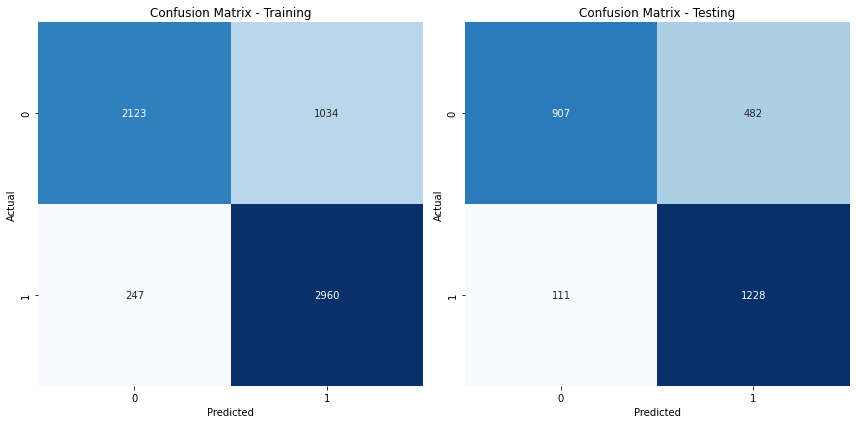

In [22]:
rf3 = RandomForestClassifier(criterion='entropy',max_depth=30,min_samples_leaf=30
                             ,min_samples_split=100,n_estimators=100,random_state=42).fit(X_train,y_train)

model_scores_classification(rf3)

# overfitting is reduced but accuracies slightly decrease
# lower params are better accuracies

##### 3rd iteration - added class weights to 1st iteration

In [ ]:
param_grid = {'n_estimators' : [40,50,60,70], # this is where the model tends to be at its best, and at lower number of trees 
              'criterion' : ['gini','entropy'],
              'max_depth' : [10,20,30],
              'min_samples_split':[60,80,100],
              'min_samples_leaf':[10,15,20],
              'class_Weights' : ['balanced','balanced_subsample']}

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

### 1.3.2 Model 2 (MLP) 

In [ ]:
model_scores_classification(mlp)

### 1.3.2.1 Hyperparameter Inspection 
##### hyperparams to be tweaked or that can be tweaked 
- <mark>hidden_layer_sizes</mark> : number of neurons in the hidden layer 
- <mark>activation</mark> : activation or squashing function for the hidden layer 
- <mark>solver</mark> : solver for weight optimization 
- <mark>max_iter</mark> : maximum number of iterations 
- <mark>alpha</mark> : regularisation term 

### 1.3.2.1 (a) hidden_layer_sizes

##### hidden layer sizes (brain size) against train and test

In [ ]:
hidden_layer_sizes = [(i,) for i in range(100, 610, 100)]

train_mean_accuracies = []
test_accuracies = []

for size in hidden_layer_sizes:
    model = MLPClassifier(hidden_layer_sizes=size, random_state=42)
    
    # Perform 5-fold cross-validation on the training set
    train_accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Record the mean accuracy across folds on the training set
    train_mean_accuracies.append(np.mean(train_accuracies))
    
    # Fit the model on the full training set and evaluate on the test set
    model.fit(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot([str(size) for size in hidden_layer_sizes], train_mean_accuracies, marker='o', label='Train Set')
plt.plot([str(size) for size in hidden_layer_sizes], test_accuracies, marker='o', label='Test Set')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Accuracy')
plt.title('Hidden Layer Sizes vs Mean Accuracy for MLP Model')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
hidden_layer_sizes = [(i,) for i in range(10, 110, 10)]

train_mean_accuracies = []
test_accuracies = []

for size in hidden_layer_sizes:
    model = MLPClassifier(hidden_layer_sizes=size, random_state=42)
    
    # Perform 5-fold cross-validation on the training set
    train_accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Record the mean accuracy across folds on the training set
    train_mean_accuracies.append(np.mean(train_accuracies))
    
    # Fit the model on the full training set and evaluate on the test set
    model.fit(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot([str(size) for size in hidden_layer_sizes], train_mean_accuracies, marker='o', label='Train Set')
plt.plot([str(size) for size in hidden_layer_sizes], test_accuracies, marker='o', label='Test Set')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Accuracy')
plt.title('Hidden Layer Sizes vs Mean Accuracy for MLP Model')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

### 1.3.2.1 (b) max_iter 

##### max_iter against accuracies (range : 100-1000)

In [ ]:
max_iters = [i for i in range(10, 110, 10)]

train_accuracies = []
test_accuracies = []

# Train MLP models with different max_iter values
for max_iter in max_iters:
    model = MLPClassifier(max_iter=max_iter, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(max_iters, train_accuracies, marker='o', label='Train Set')
plt.plot(max_iters, test_accuracies, marker='o', label='Test Set')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Max Iterations vs Accuracy for MLP Model')
plt.legend()
plt.show()

In [ ]:
max_iters = [i for i in range(100, 1000, 10)]

train_accuracies = []
test_accuracies = []

# Train MLP models with different max_iter values
for max_iter in max_iters:
    model = MLPClassifier(max_iter=max_iter, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(max_iters, train_accuracies, marker='o', label='Train Set')
plt.plot(max_iters, test_accuracies, marker='o', label='Test Set')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Max Iterations vs Accuracy for MLP Model')
plt.legend()
plt.show()

# scores tend to plateau at a high number of iterations

##### max_iter and solvers vs train score 

In [ ]:
max_iters = [i for i in range(10, 110, 10)]
solvers = ['lbfgs', 'sgd', 'adam']

# Create a dictionary to store training scores for each solver
train_scores = {solver: [] for solver in solvers}

# Train MLP models with different max_iter values and solvers
for solver in solvers:
    for max_iter in max_iters:
        model = MLPClassifier(max_iter=max_iter, solver=solver, random_state=42)
        
        # Train the model on the training set
        model.fit(X_train, y_train)
        
        # Evaluate accuracy on the training set
        train_accurbacy = model.score(X_train, y_train)
        train_scores[solver].append(train_accuracy)

# Plotting the graph for different solvers
for solver in solvers:
    plt.plot(max_iters, train_scores[solver], marker='o', label=f'Train Set ({solver} solver)')

plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Max Iterations vs Training Accuracy for MLP Model (Different Solvers)')
plt.legend()
plt.show()

# according to documentation, 'lbfgs' solver is better for smaller and lesser complex datasets
# warnings show here that the model is not converging, it might need alot more iterations for it to converge as
# compared to other solvers

In [ ]:
max_iters = [i for i in range(100, 1100, 100)]
solvers = ['lbfgs', 'sgd', 'adam']

# Create a dictionary to store training scores for each solver
train_scores = {solver: [] for solver in solvers}

# Train MLP models with different max_iter values and solvers
for solver in solvers:
    for max_iter in max_iters:
        model = MLPClassifier(max_iter=max_iter, solver=solver, random_state=42)
        
        # Train the model on the training set
        model.fit(X_train, y_train)
        
        # Evaluate accuracy on the training set
        train_accurbacy = model.score(X_train, y_train)
        train_scores[solver].append(train_accuracy)

# Plotting the graph for different solvers
for solver in solvers:
    plt.plot(max_iters, train_scores[solver], marker='o', label=f'Train Set ({solver} solver)')

plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Max Iterations vs Training Accuracy for MLP Model (Different Solvers)')
plt.legend()
plt.show()

# according to documentation, 'lbfgs' solver is better for smaller and lesser complex datasets
# warnings show here that the model is not converging, it might need alot more iterations for it to converge as
# compared to other solvers
# sometimes the model does not converge for other solvers as well 

### 1.3.2.2 Optimizing Hyperparameters 

### 1.3.2.2 (a) GridSearchCV

In [ ]:
mlp_models = [mlp]
mlp_names = ['base']

##### 1st iteration - low set of max_iter

In [ ]:
param_grid = {'hidden_layer_sizes' : [(50,),(100,),(200,)],
              'activation' : ['identity','logistic','tanh','relu'],
              'solver' : ['adam','sgd'], # we dont use lbfgs as it is a large dataset 
              'max_iter' : [40,50,60]} # start with a lower set of iterations 

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
mlp2 = MLPClassifier(activation='relu',hidden_layer_sizes=(100,),max_iter = 50,solver='adam',random_state=42).fit(X_train,y_train)

model_scores_classification(mlp2)
mlp_models.append(mlp2)
mlp_names.append('mlp2 - low iterations')


# no change in scores, we need to try to increase it 

##### 2nd iteration - higher iterations 
- in the previous search, we used relatively large number neurons with little iterations, which might be why the scores are not as optimal

In [ ]:
param_grid = {'hidden_layer_sizes' : [(50,),(100,),(200,)],
              'activation' : ['identity','logistic','tanh','relu'],
              'solver' : ['adam','sgd'], # we dont use lbfgs as it is a large dataset 
              'max_iter' : [100,200,300]} # more iterations for the model to learn? 

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
mlp3 = MLPClassifier(activation='logistic',hidden_layer_sizes=(200,),max_iter = 200
                     ,solver='adam',random_state=42).fit(X_train,y_train)

model_scores_classification(mlp3)
mlp_models.append(mlp3)
mlp_names.append('mlp3 - higher iterations')

# scores increase with close f1 scores

##### 3rd iteration - trying higher layers and higher iterations 
- for the model to learn better 

In [ ]:
param_grid = {'hidden_layer_sizes' : [(100,),(200,),(300,),(400,)],
              'activation' : ['identity','logistic','tanh','relu'],
              'solver' : ['adam','sgd'], # we dont use lbfgs as it is a large dataset 
              'max_iter' : [500,700,1000]} # more iterations for the model to learn? 

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
mlp4 = MLPClassifier(activation='logistic',hidden_layer_sizes=(300,),max_iter = 500
                     ,solver='adam',random_state=42).fit(X_train,y_train)

model_scores_classification(mlp4)
mlp_models.append(mlp4)
mlp_names.append('mlp4 - higher iterations,layers')

# train score remained the same 
# test score decreased
# how to improve test score?  

##### 4th iteration - add regularisation parameter 
- to reduce overfitting, we try to implement regularization (alpha) 
- instead of using gridsearch, we see the effect of regularization for the specific model mlp2 (previously optimized) 

In [ ]:
alphas = np.logspace(-6, 3, 10)

# Calculate training and test scores at different alpha values
train_scores, test_scores = validation_curve(
    mlp4, X_train, y_train, param_name='alpha', param_range=alphas, cv=5, scoring='accuracy'
)

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, np.mean(train_scores, axis=1), label='Training score', marker='o')
plt.semilogx(alphas, np.mean(test_scores, axis=1), label='Cross-validation score', marker='o')
plt.title('Validation Curve for MLPClassifier')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
mlp5 = MLPClassifier(activation='logistic',hidden_layer_sizes=(200,),max_iter = 200
                     ,solver='adam',alpha=0.0001,random_state=42).fit(X_train,y_train)

model_scores_classification(mlp5)
mlp_models.append(mlp5)
mlp_names.append('mlp5 - regularisation added')

# no change in scores 

### 1.3.3.3 'optimized' models

In [ ]:
scores_table = []
for model, name in zip(mlp_models, mlp_names):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    scores_table.append([name, train_score, test_score])

df_scores_mlp = pd.DataFrame(scores_table, columns=["Model", "Train Score", "Test Score"])

df_scores_mlp

### 1.3.3 Model 3 (ADA)

### 1.3.3.1 Hyperparameter Inspection 
##### hyperparams to be tweaked or that can be tweaked 
- <mark>estimator</mark> : we can use the previous models
- <mark>n_estimators</mark> : number of estimators 
- <mark>learning_rate</mark> : learning rate, weight applied at each iteration 
- <mark>algorithm</mark> : algorithm 

### 1.3.3.1 (a) n_estimators 

##### n_estimators against model accuracies 

In [ ]:
estimators = [i for i in range(100, 1100, 10)]

train_accuracies = []
test_accuracies = []

# Train AdaBoost models with different n_estimators values
for n_estimators in estimators:
    model = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(estimators, train_accuracies,label='Train Set')
plt.plot(estimators, test_accuracies,label='Test Set')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Number of Estimators vs Accuracy for AdaBoost Classifier')
plt.legend()
plt.show()

# scores tend to see increases for the train set, but for the test set it is inconsistent 
# we can try to strike a balance for it 

### 1.3.3.1 (b) learning_rate

###### learning rate against model accuracies 

In [ ]:
learning_rates = [0.01, 0.1, 0.5, 1.0]

train_accuracies = []
test_accuracies = []

# Train AdaBoost models with different learning rates
for learning_rate in learning_rates:
    model = AdaBoostClassifier(learning_rate=learning_rate, n_estimators=500, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(learning_rates, train_accuracies, marker='o', label='Train Set')
plt.plot(learning_rates, test_accuracies, marker='o', label='Test Set')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Learning Rate vs Accuracy for AdaBoost Classifier')
plt.legend()
plt.show()

### 1.3.3.2 Optimizing Hyperparameters 

### 1.3.3.2 (a) GridSearchCV 

##### 1st iteration - lower estimators

In [ ]:
param_grid = {'n_estimators' : [200,300,400],
              'learning_rate' : [0.6,0.8,1],
              'algorithm' : ['SAMME.R','SAMME']}

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=ada, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
ada2 = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1,n_estimators=300,random_state=42).fit(X_train,y_train)

model_scores_classification(ada2)

# train and test scores increase but is slightly overfit

##### 2nd iteration - lower learning rate 
- high learning rates tend to lead to overfitting 

In [ ]:
param_grid = {'n_estimators' : [200,300,400],
              'learning_rate' : [0.2,0.4,0.6],
              'algorithm' : ['SAMME.R','SAMME']}

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=ada, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
ada3  = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.6,n_estimators=400,random_state=42).fit(X_train,y_train)

model_scores_classification(ada3)

# overfitting is reduced 

##### 3rd iteration - use lower number of estimators 
- higher estimators leads to overfitting due to complexity? (confirm this)

In [ ]:
param_grid = {'n_estimators' : [50,100,200],
              'learning_rate' : [0.2,0.4,0.6],
              'algorithm' : ['SAMME.R','SAMME']}

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=ada, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
ada4  = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.6,n_estimators=200,random_state=42).fit(X_train,y_train)

model_scores_classification(ada4)

# lower iterations leads test score to be lower? 

##### 4th iteration - use rf3 as a base estimator

## 2. Airbnb

In [29]:
# regression models 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

### 2.1 Load and Sample the data

In [30]:
df_bnb = pd.read_csv('./bnb_transformed.csv')

In [31]:
df_bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6307 entries, 0 to 6306
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         6307 non-null   int64  
 1   neighbourhood                   6307 non-null   int64  
 2   latitude                        6307 non-null   float64
 3   longitude                       6307 non-null   float64
 4   room_type                       6307 non-null   int64  
 5   price                           6307 non-null   float64
 6   minimum_nights                  6307 non-null   float64
 7   number_of_reviews               6307 non-null   float64
 8   reviews_per_month               6307 non-null   float64
 9   calculated_host_listings_count  6307 non-null   float64
 10  availability_365                6307 non-null   float64
 11  last_review_year                6307 non-null   float64
 12  last_review_month               63

In [32]:
df_bnb.head()

,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,...,cosy,cozy,mins,mrt,near,orchard,private,room,spacious,studio
0,227796,131,1.746376,-2.626110,1,81.0,1.729361,1.157713,0.217513,-0.684275,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,1.000000,0.0,0.0
1,1439258,469,-0.904317,-1.710715,1,44.0,1.084695,1.157713,0.137405,-0.226308,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.641676,0.0,0.0
2,1439258,469,-0.927419,-1.596939,1,40.0,1.406505,0.879358,-0.124190,-0.226308,...,0.0,0.0,0.720567,0.48444,0.0,0.0,0.0,0.496085,0.0,0.0
3,1521514,134,0.463587,-0.512277,1,65.0,-0.547453,1.647549,1.060556,-0.610410,...,0.0,0.0,1.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
4,1439258,469,-0.842913,-1.677979,1,44.0,1.406505,1.008257,-0.021196,-0.226308,...,0.0,0.0,1.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0


In [33]:
df_bnb.isnull().sum()

host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
last_review_year                  0
last_review_month                 0
last_review_day                   0
apartment                         0
apt                               0
bed                               0
bedroom                           0
br                                0
central                           0
city                              0
condo                             0
cosy                              0
cozy                              0
mins                              0
mrt                               0
near                              0
orchard                     

In [34]:
df_bnb.describe()

,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,...,cosy,cozy,mins,mrt,near,orchard,private,room,spacious,studio
count,6.307000e+03,6307.000000,6.307000e+03,6.307000e+03,6307.000000,6307.000000,6.307000e+03,6.307000e+03,6.307000e+03,6.307000e+03,...,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000
mean,9.268678e+07,581.983986,1.344935e-14,4.870975e-13,1.537498,156.268432,-2.632603e-15,2.269354e-14,-2.547581e-15,1.496750e-15,...,0.038088,0.038503,0.034565,0.105723,0.085033,0.044024,0.045422,0.119620,0.051807,0.067715
std,8.377692e+07,327.440241,1.000079e+00,1.000079e+00,0.599170,98.686740,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,...,0.161810,0.159995,0.150851,0.232204,0.214786,0.170141,0.178046,0.275969,0.181525,0.215714
min,2.366600e+04,101.000000,-3.632829e+00,-3.501983e+00,0.000000,35.000000,-1.236524e+00,-1.132311e+00,-1.180403e+00,-6.842753e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.114972e+07,362.000000,-7.690466e-01,-4.677651e-01,1.000000,81.000000,-5.474529e-01,-1.132311e+00,-1.180403e+00,-6.547290e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.344891e+07,477.000000,1.444091e-01,-6.675572e-02,2.000000,135.000000,-1.463868e-01,-1.756958e-02,6.399646e-02,-4.922244e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.598048e+08,994.000000,6.596528e-01,4.478298e-01,2.000000,208.000000,8.409538e-01,9.270265e-01,8.235087e-01,2.907525e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.885676e+08,1043.000000,3.781817e+00,2.683822e+00,2.000000,394.000000,1.729361e+00,1.647549e+00,1.733648e+00,3.348795e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2.1.1 Train and Test Splits 

In [35]:
X = df_bnb.drop(['price'], axis =1)
y = df_bnb['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2.1.2 Feature Importances

In [36]:
# using OLS model to see the p-values and coefficients 
ols = sm.OLS(y_train, X_train).fit()
# Summary statistics from the model
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                              795.9
Date:                Tue, 30 Jan 2024   Prob (F-statistic):                        0.00
Time:                        23:43:00   Log-Likelihood:                         -25086.
No. Observations:                4414   AIC:                                  5.023e+04
Df Residuals:                    4383   BIC:                                  5.043e+04
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
host_id                         4.388e-08   1.45e-08      3.036      0.002    1.55e-08    7.22e-08
neighbourhood                     -0.0139      0.004     -3.523      0.000      -0.022      -0.006
latitude                          -8.0632      1.172     -6.879      0.000     -10.361      -5.765
longitude                         -1.2555      1.364     -0.920      0.357      -3.930       1.419
room_type                        100.8261      2.061     48.912      0.000      96.785     104.867
minimum_nights                   -20.2104      1.241    -16.283      0.000     -22.644     -17.777
number_of_reviews                 -8.3875      2.778     -3.019      0.003     -13.834      -2.941
reviews_per_month                  0.6697      2.879      0.233      0.816      -4.975       6.314
calculated_host_listings_count    -9.7985      1.431     -6.846      0.000     -12.604      -6.993
availability_365                  15.6010      1.175     13.283      0.000      13.298      17.904
last_review_year                  -0.0007      0.003     -0.258      0.796      -0.006       0.005
last_review_month                 -0.4210      0.552     -0.763      0.446      -1.503       0.661
last_review_day                    0.3367      0.151      2.231      0.026       0.041       0.633
apartment                         15.2260      5.080      2.997      0.003       5.267      25.185
apt                              -14.5068      6.197     -2.341      0.019     -26.655      -2.358
bed                               10.1944      5.989      1.702      0.089      -1.547      21.936
bedroom                           25.0961      5.161      4.863      0.000      14.978      35.214
br                                62.4632      5.223     11.958      0.000      52.223      72.704
central                            5.7609      6.552      0.879      0.379      -7.085      18.607
city                             -13.9327      5.350     -2.604      0.009     -24.421      -3.445
condo                             -8.6539      6.647     -1.302      0.193     -21.685       4.377
cosy                             -36.1932      6.551     -5.525      0.000     -49.036     -23.351
cozy                             -41.1451      6.839     -6.016      0.000     -54.553     -27.738
mins                             -22.3313      7.248     -3.081      0.002     -36.541      -8.121
mrt                                7.9117      5.047      1.567      0.117      -1.984      17.807
near                              -4.2160      5.122     -0.823      0.410     -14.257       5.825
orchard                           38.3296      6.484      5.911      0.000      25.617      51.042
private       

In [37]:
# choose which features to drop in train and test 

columns_to_drop = ['apartment', 'apt', 'bed', 'bedroom', 'br', 'central', 'city', 'condo', 'cosy', 'cozy', 
                   'mins', 'near', 'orchard', 'room', 'studio','longitude','latitude']

X_train = X_train.drop(columns=columns_to_drop)

X_test = X_test.drop(columns=columns_to_drop)

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4414 entries, 6206 to 860
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         4414 non-null   int64  
 1   neighbourhood                   4414 non-null   int64  
 2   room_type                       4414 non-null   int64  
 3   minimum_nights                  4414 non-null   float64
 4   number_of_reviews               4414 non-null   float64
 5   reviews_per_month               4414 non-null   float64
 6   calculated_host_listings_count  4414 non-null   float64
 7   availability_365                4414 non-null   float64
 8   last_review_year                4414 non-null   float64
 9   last_review_month               4414 non-null   float64
 10  last_review_day                 4414 non-null   float64
 11  mrt                             4414 non-null   float64
 12  private                         

### 2.2 Build the Model(s)

In [39]:
models = []

model_names = []

In [40]:
# linear regression
lr = LinearRegression().fit(X_train,y_train)

models.append(lr)
model_names.append('LinearRegression')

In [41]:
# decision tree regressor
dtr = DecisionTreeRegressor(random_state=42).fit(X_train,y_train)

models.append(dtr)
model_names.append('DTree Regressor')

In [42]:
# random forest regressor 
rfr = RandomForestRegressor(random_state=42).fit(X_train, y_train)

models.append(rfr)
model_names.append('Random Forest Regressor')

In [43]:
# SVR
svr = SVR().fit(X_train, y_train)

models.append(svr)
model_names.append('SVR')

In [44]:
# adaptive boosting 
ada_r = AdaBoostRegressor(random_state=42).fit(X_train, y_train)

models.append(ada_r)
model_names.append('ADA Boost')

In [45]:
# XGB
xgb_r = XGBRegressor(random_state=42).fit(X_train, y_train)

models.append(xgb_r)
model_names.append('XG Boost')

In [46]:
# multilayer perceptron
mlp_r = MLPRegressor(random_state=42).fit(X_train,y_train)

models.append(mlp_r)
model_names.append('Multilayer Perceptron')

### 2.2.1 Consolidated View of Model Accuracies 

In [47]:
results = []

for model, model_name in zip(models, model_names):
    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Calculate metrics
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)

    train_rmse = sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = sqrt(mean_squared_error(y_test, model.predict(X_test)))

    # Append results to the list
    results.append({
        'Model': model_name,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_R2': train_r2,
        'Test_R2': test_r2
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

,Model,Train_RMSE,Test_RMSE,Train_R2,Test_R2
0,LinearRegression,76.251880,80.042311,0.389106,0.374134
1,DTree Regressor,7.881719,86.985652,0.993473,0.260842
2,Random Forest Regressor,23.769790,63.447484,0.940637,0.606748
3,SVR,98.445795,102.874804,-0.018261,-0.033856
4,ADA Boost,76.823480,80.526183,0.379913,0.366544
5,XG Boost,27.245337,63.935476,0.922008,0.600676
6,Multilayer Perceptron,130.209932,134.809253,-0.781365,-0.775339


### 2.3 Evaluate and Improve the Model(s)
These models will be chosen for further evaluation and tuning  : <mark>Random Forest Regressor</mark>, <mark>SVR</mark>,<mark>XG Boost</mark>.

In [ ]:
notebook_end_time = time.time()

notebook_elapsed_time = notebook_end_time-notebook_start_time

minutes, seconds = divmod(notebook_elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))